In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
def datasplit(file):
    with open(file, 'r') as dataset:
        lines = dataset.readlines()
    header = lines[0]
    lines = lines[1:]

    random.shuffle(lines)
    split_index = int(0.7 * len(lines))
    training_set = lines[:split_index]
    testing_set = lines[split_index:]

    trainfile = 'train_house_prices.csv'
    testfile = 'test_house_prices.csv'
    with open(trainfile, 'w') as file1:
        file1.write(header)
        file1.writelines(training_set)
    with open(testfile, 'w') as file2:
        file2.write(header)
        file2.writelines(testing_set)

    return trainfile, testfile
training_file, testing_file = datasplit('house_price_regression_dataset.csv')

In [7]:
def readdata(file):
    df = pd.read_csv(file)
    return df

In [8]:
train_df = readdata(training_file)
train_df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,4061,1,1,1952,2.239791,0,6,7.874204e+05
1,1718,5,3,1988,3.130249,0,6,4.247126e+05
2,1993,4,3,1989,2.032452,0,7,4.621857e+05
3,1454,4,1,2010,2.994605,1,3,3.698549e+05
4,2494,3,1,1990,4.112830,1,3,5.788708e+05
...,...,...,...,...,...,...,...,...
695,1970,4,2,1952,4.413227,2,8,4.533599e+05
696,3505,3,1,1983,4.126905,0,3,7.531862e+05
697,4230,3,1,1951,3.079504,1,9,8.748563e+05
698,2233,5,3,2010,4.106066,2,5,5.737979e+05


In [9]:
def scaledata(dataframe):
    means = dataframe.mean()
    standard_deviations = dataframe.std()
    scaled_dataframe = (dataframe - means) / standard_deviations
    features = scaled_dataframe.to_numpy()
    return scaled_dataframe

In [12]:
scaled_dataframe = scaledata(train_df)
scaled_dataframe

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,0.970295,-1.395044,-1.170048,-1.717907,-0.411683,-1.286385,0.137999,0.638401
1,-0.897748,1.385115,1.263930,0.031023,0.267182,-1.286385,0.137999,-0.793227
2,-0.678494,0.690075,1.263930,0.079604,-0.569753,-1.286385,0.489268,-0.645318
3,-1.108232,0.690075,-1.170048,1.099813,0.163770,-0.049476,-0.915809,-1.009753
4,-0.279054,-0.004965,-1.170048,0.128185,1.016280,-0.049476,-0.915809,-0.184756
...,...,...,...,...,...,...,...,...
695,-0.696832,0.690075,0.046941,-1.717907,1.245295,1.187432,0.840537,-0.680154
696,0.527003,-0.004965,-1.170048,-0.211884,1.027010,-1.286385,-0.915809,0.503276
697,1.105036,-0.004965,-1.170048,-1.766488,0.228495,-0.049476,1.191806,0.983515
698,-0.487146,1.385115,1.263930,1.099813,1.011122,1.187432,-0.213271,-0.204779


In [13]:
target_column = scaled_dataframe['House_Price']
features = scaled_dataframe.iloc[:, :-1].to_numpy()
targets = target_column.to_numpy()
print(features)
print(targets)

[[ 0.97029459 -1.39504419 -1.17004799 ... -0.41168298 -1.28638466
   0.13799859]
 [-0.89774832  1.38511505  1.26392999 ...  0.26718203 -1.28638466
   0.13799859]
 [-0.67849446  0.69007524  1.26392999 ... -0.56975349 -1.28638466
   0.48926773]
 ...
 [ 1.10503605 -0.00496457 -1.17004799 ...  0.22849543 -0.04947633
   1.19180602]
 [-0.48714563  1.38511505  1.26392999 ...  1.01112246  1.187432
  -0.21327055]
 [ 1.52839533  0.69007524  1.26392999 ... -0.2348081   1.187432
  -0.56453969]]
[ 6.38400831e-01 -7.93226707e-01 -6.45318064e-01 -1.00975273e+00
 -1.84755901e-01  1.36503123e+00  9.98702505e-01 -1.75441919e+00
  9.85592946e-01 -1.08489967e+00  6.24816032e-01  5.47487374e-01
  1.90468066e+00  1.36989374e+00  4.83344962e-01 -1.33353964e+00
  7.97549093e-01 -1.50638891e+00 -2.09473659e-01  4.28342783e-01
 -1.88855668e+00  1.39138205e+00  6.25516064e-02  1.51926066e+00
 -2.18628516e-01  1.44673009e+00 -1.01454550e+00  1.72572988e+00
  4.89162965e-01 -9.38965693e-02  1.34057033e+00  3.72168

In [14]:
def accuracy(features, targets, weights, bias):
    predictions = np.dot(features, weights) + bias
    residual_square_sum = np.sum((targets - predictions) ** 2)
    total_square_sum = np.sum((targets - np.mean(targets)) ** 2)
    r_squared = 1 - (residual_square_sum / total_square_sum)

    return r_squared

In [23]:
def gradient_descent(features, targets, learning_rate=0.01, epochs=500):
    bias = 0
    weights = np.zeros(features.shape[1])

    mean_square_errors = np.empty(epochs)
    r_squareds = np.empty(epochs)

    for iternum in range(epochs):
        errors = np.dot(features, weights) + bias - targets
        
        mean_square_errors[iternum] = (0.5 / len(features)) * np.sum(errors ** 2)
        r_squareds[iternum] = accuracy(features, targets, weights, bias)
        
        weight_gradient = (1 / len(features)) * np.dot(features.T, errors)
        bias_gradient = (1 / len(features)) * np.sum(errors)

        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

    return weights, bias, mean_square_errors, r_squareds

In [24]:
weights, bias, mse, r2 = gradient_descent(features, targets)
print(weights)
print(bias)

[9.81772552e-01 5.43506387e-02 2.31117950e-02 8.01619532e-02
 8.04616836e-02 1.87662133e-02 2.46825596e-04]
1.1178914936595321e-16


In [25]:
def graphing(mean_square_errors, r_squareds):
    epoch = range(len(mean_square_errors))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epoch, mean_square_errors)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE v Epoch')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch, r_squareds)
    plt.xlabel('Epoch')
    plt.ylabel('R^2')
    plt.title('R^2 v Epoch')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

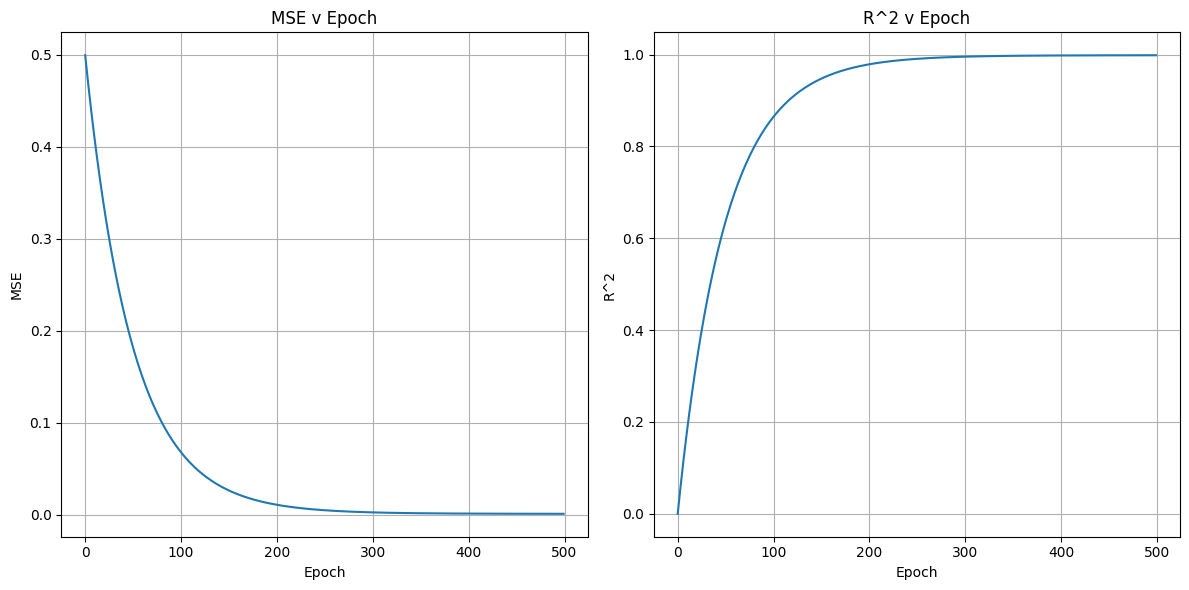

In [26]:
graphing(mse, r2)

In [27]:
testingframe = readdata('test_house_prices.csv')
testingframe

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1297,2,3,1970,1.149391,2,1,284798.213460
1,2700,5,3,1965,3.108768,2,4,617900.494841
2,1213,1,2,2004,1.297366,2,4,269665.861398
3,2714,3,1,1967,3.413824,1,4,574450.484182
4,3456,2,1,2014,4.052715,1,9,763645.610159
...,...,...,...,...,...,...,...,...
295,2765,5,2,1992,4.124867,0,5,652434.705223
296,3057,3,2,1966,1.418750,0,2,624112.160020
297,1655,2,3,1997,2.519505,2,5,396277.339984
298,3499,5,1,2021,3.500474,1,5,804433.809322


In [28]:
scaled_testingframe = scaledata(testingframe)
scaled_testingframe

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-1.153980,-0.677296,1.222702,-0.709523,-1.282026,1.229217,-1.552932,-1.253668
1,-0.038735,1.461533,1.222702,-0.951571,0.264066,1.229217,-0.547436,0.058905
2,-1.220752,-1.390238,0.000000,0.936403,-1.165263,1.229217,-0.547436,-1.313297
3,-0.027607,0.035647,-1.222702,-0.854752,0.504777,0.024102,-0.547436,-0.112307
4,0.562209,-0.677296,-1.222702,1.420498,1.008909,0.024102,1.128389,0.633207
...,...,...,...,...,...,...,...,...
295,0.012933,1.461533,0.000000,0.355488,1.065842,-1.181013,-0.212271,0.194986
296,0.245044,0.035647,0.000000,-0.903161,-1.069482,-1.181013,-1.217766,0.083382
297,-0.869406,-0.677296,1.222702,0.597536,-0.200906,1.229217,-0.212271,-0.814390
298,0.596390,1.461533,-1.222702,1.759365,0.573150,0.024102,-0.212271,0.793931


In [31]:
target_column = scaled_testingframe['House_Price']
features = scaled_testingframe.iloc[:, :-1].to_numpy()
targets = target_column.to_numpy()
print(features)
print(targets)

[[-1.15398035 -0.67729556  1.22270193 ... -1.28202562  1.22921736
  -1.55293153]
 [-0.03873548  1.46153253  1.22270193 ...  0.2640655   1.22921736
  -0.54743629]
 [-1.22075196 -1.39023826  0.         ... -1.16526265  1.22921736
  -0.54743629]
 ...
 [-0.86940611 -0.67729556  1.22270193 ... -0.20090615  1.22921736
  -0.21227122]
 [ 0.59638971  1.46153253 -1.22270193 ...  0.57315008  0.0241023
  -0.21227122]
 [-0.74778639 -1.39023826  1.22270193 ...  0.94128338  0.0241023
  -0.21227122]]
[-1.25366835  0.05890518 -1.31329666 -0.1123075   0.6332068  -1.05420495
 -0.81017877  1.50632579  1.51580748  1.15937912  1.48115067 -0.56037334
 -0.585028   -0.43831896  0.54116159 -1.34071662 -0.33610675 -1.62281427
 -1.05162047  1.46150839  1.53804281 -1.32307132 -0.7016781   1.2641816
 -0.46233029  0.23314978  0.47124426 -0.51341741 -0.3433627   0.54114053
 -1.26878603  0.88366072 -1.34193356 -0.12186885  1.12758411  0.01806294
  1.43564833  1.59240359 -0.49282184  1.58210944 -0.26960035  0.98281551


In [32]:
testing_accuracy = accuracy(features, targets, weights, bias)
print(f"{testing_accuracy * 100}%")

99.84894938942872%
